<a href="https://colab.research.google.com/github/Parths131/traffic-forecasting/blob/main/sarima_guwahati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blr-traffic-data.csv to blr-traffic-data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
path = '/content/blr-traffic-data.csv'
df = pd.read_csv(path)

In [ ]:
order = (0,2,1)
seasonal_order = (2,1,1,12)

In [ ]:
df_excluded = df[['Month','guw1']]
df_excluded = df_excluded[33:94]

In [ ]:
df_excluded

,Month,guw1
33,Jan-14,"1,90,159"
34,Feb-14,"1,59,929"
35,Mar-14,"1,60,614"
36,Apr-14,"1,81,599"
37,May-14,"1,75,208"
...,...,...
89,Sep-18,"4,27,733"
90,Oct-18,"5,03,705"
91,Nov-18,"4,90,006"
92,Dec-18,"5,52,958"


In [ ]:
df_excluded['Month'] = pd.to_datetime(df_excluded['Month'], format='%b-%y')

In [ ]:
df_excluded['guw1'] = df_excluded['guw1'].str.replace(',', '').astype(int)

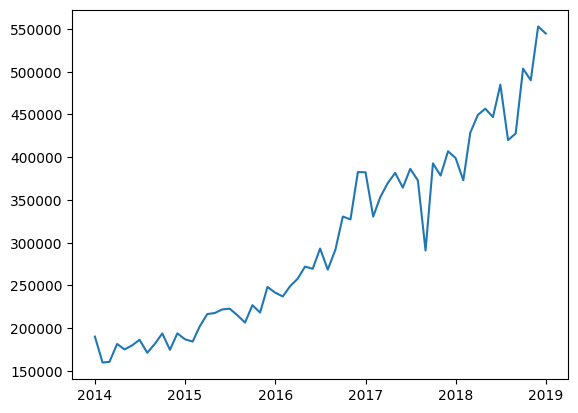

In [ ]:
plt.plot(df_excluded['Month'], df_excluded['guw1'])

In [ ]:
adf_test = adfuller(df_excluded['guw1'].diff().diff().dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -4.015428481767651
p-value: 0.0013318433578335068


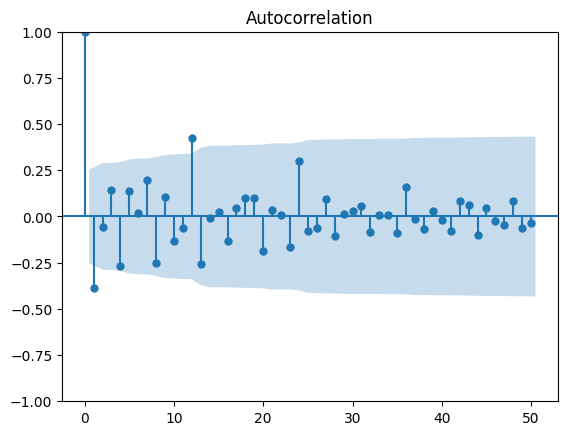

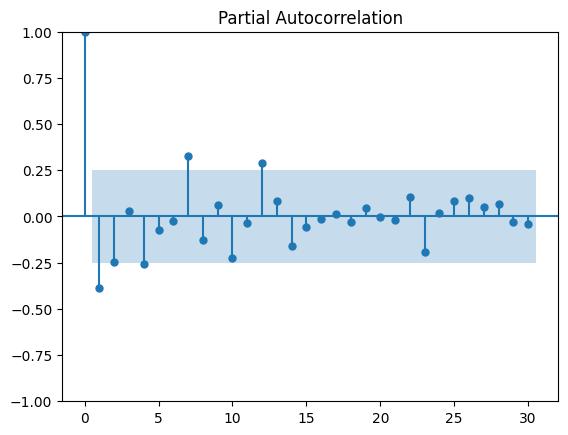

In [ ]:
acf_original = plot_acf(df_excluded['guw1'].diff().dropna(), lags=50)

pacf_original = plot_pacf(df_excluded['guw1'].diff().dropna(), lags=30)

In [ ]:
test_start = datetime(2018, 8, 1)
df_train = df_excluded[(df_excluded['Month'] < test_start)]

In [ ]:
df_test = df_excluded[(df_excluded['Month'] >= test_start)]

In [ ]:
testing_range = pd.date_range(start=datetime(2018, 8, 1), end=datetime(2019, 1, 1), freq='MS')

model = SARIMAX(df_train['guw1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Month': testing_range, 'guw1': testing})

print(testing_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


        Month           guw1
55 2018-08-01  472579.420586
56 2018-09-01  403062.428556
57 2018-10-01  498281.956316
58 2018-11-01  487322.456433
59 2018-12-01  519491.370215
60 2019-01-01  520893.145558


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
testing_df = testing_df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
rmse = np.sqrt(np.mean((df_test['guw1'] - testing_df['guw1']) ** 2))

mae = np.mean(np.abs(df_test['guw1'] - testing_df['guw1']))

rmse, mae

(29117.78189139172, 23759.343917981663)

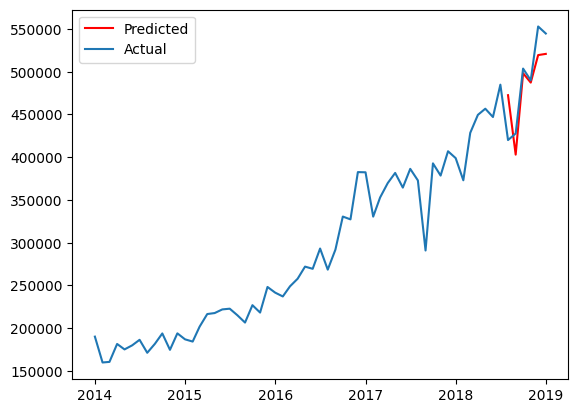

In [ ]:
plt.plot(testing_df['Month'][:6], testing_df['guw1'][:6], label='Predicted', color='red')
plt.plot(df_excluded['Month'], df_excluded['guw1'], label='Actual')
plt.legend()

In [ ]:
forecast_range = pd.date_range(start=datetime(2020, 3, 1), end=datetime(2049, 12, 31), freq='MS')

model = SARIMAX(df_excluded['guw1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Month': forecast_range, 'guw1': predictions})

print(predictions_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


         Month          guw1
94  2020-03-01  5.161950e+05
95  2020-04-01  5.620160e+05
96  2020-05-01  5.828762e+05
97  2020-06-01  5.936969e+05
98  2020-07-01  5.845531e+05
..         ...           ...
447 2049-08-01  1.124279e+07
448 2049-09-01  1.123158e+07
449 2049-10-01  1.125966e+07
450 2049-11-01  1.137966e+07
451 2049-12-01  1.140630e+07

[358 rows x 2 columns]


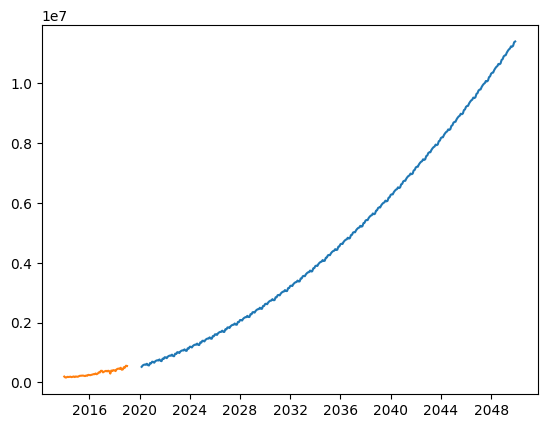

In [ ]:
plt.plot(predictions_df['Month'], predictions_df['guw1'], label='Predicted')
plt.plot(df_excluded['Month'], df_excluded['guw1'], label='Predicted')

In [ ]:
predictions_df

,Month,guw1
94,2020-03-01,5.161950e+05
95,2020-04-01,5.620160e+05
96,2020-05-01,5.828762e+05
97,2020-06-01,5.936969e+05
98,2020-07-01,5.845531e+05
...,...,...
447,2049-08-01,1.124279e+07
448,2049-09-01,1.123158e+07
449,2049-10-01,1.125966e+07
450,2049-11-01,1.137966e+07
